In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *
from parametrizations import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
backend = Aer.get_backend('qasm_simulator')

# Regularized Feature Map

## Regularization

In [3]:
np.random.seed(42)

n = 200
n_features = 4
epochs = 100
x = np.random.uniform(0, np.pi, (n, n_features))

y = np.sin(2*x[:,2])
y = scaler(y, a=0.1, b=0.9).reshape(-1, 1)

x_train, y_train = x[:100,:], y[:100,:]

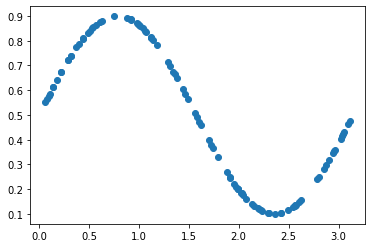

In [4]:
plt.plot(x_train[:,2], y_train,"o")
plt.show()

### No Penalty

In [ ]:
np.random.seed(42)
model_list = []
for i in tqdm(range(10)):
    optimizer = Adam(lr=0.1)
    model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=2,
                             alpha=0.00,
                             backend=backend, 
                             shots=0, 
                             optimizer=optimizer)
    
    model.train(x_train, y_train, epochs=epochs, verbose=True) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("sparse_reg_model_no_penalty"))

### Low penalty

In [5]:
np.random.seed(42)
model_list = []
for i in tqdm(range(10)):
    optimizer = Adam(lr=0.1)
    model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=2,
                             alpha=0.01,
                             backend=backend, 
                             shots=0, 
                             optimizer=optimizer)
    
    model.train(x_train, y_train, epochs=epochs, verbose=True) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("sparse_reg_model_low_penalty"))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09149225163331436
epoch: 1, loss: 0.07398463729155445
epoch: 2, loss: 0.07270063009201992
epoch: 3, loss: 0.072228556812425
epoch: 4, loss: 0.06829200489886969
epoch: 5, loss: 0.06290549262867888
epoch: 6, loss: 0.05751913566056557
epoch: 7, loss: 0.05224870102265051
epoch: 8, loss: 0.04706095904536158
epoch: 9, loss: 0.042378337688963715
epoch: 10, loss: 0.03883510351503852
epoch: 11, loss: 0.03639525700377269
epoch: 12, loss: 0.03448534141085668
epoch: 13, loss: 0.03266577338857088
epoch: 14, loss: 0.03087954453002174
epoch: 15, loss: 0.02922718092844767
epoch: 16, loss: 0.027655381268305197
epoch: 17, loss: 0.026133585717989297
epoch: 18, loss: 0.024803414824433507
epoch: 19, loss: 0.023794266064609756
epoch: 20, loss: 0.02310920298045928
epoch: 21, loss: 0.022653176536663405
epoch: 22, loss: 0.02230907293927733
epoch: 23, loss: 0.021993934872634773
epoch: 24, loss: 0.021664865043919037
epoch: 25, loss: 0.02128541911357773
epoch: 26, loss: 0.020811478614900625
epoc

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07796059875685021
epoch: 1, loss: 0.0793457621938918
epoch: 2, loss: 0.07794241204163055
epoch: 3, loss: 0.07805079850050989
epoch: 4, loss: 0.07827497391252988
epoch: 5, loss: 0.07812556748766024
epoch: 6, loss: 0.07789247206596739
epoch: 7, loss: 0.0777548666070149
epoch: 8, loss: 0.07768102304722348
epoch: 9, loss: 0.07751344664496125
epoch: 10, loss: 0.07700447637629891
epoch: 11, loss: 0.07597325488564569
epoch: 12, loss: 0.07423643936620308
epoch: 13, loss: 0.07084034192625943
epoch: 14, loss: 0.06602911348985657
epoch: 15, loss: 0.05974538779781792
epoch: 16, loss: 0.05170202696767217
epoch: 17, loss: 0.043531945013664954
epoch: 18, loss: 0.03663478026183465
epoch: 19, loss: 0.03132975050263264
epoch: 20, loss: 0.027522965344160325
epoch: 21, loss: 0.0249645681775895
epoch: 22, loss: 0.02374630853632954
epoch: 23, loss: 0.023719799893733615
epoch: 24, loss: 0.024068455210408537
epoch: 25, loss: 0.024126976010041594
epoch: 26, loss: 0.02394352791068107
epoch: 27

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07815553753266545
epoch: 1, loss: 0.07837714493949675
epoch: 2, loss: 0.07755205814448407
epoch: 3, loss: 0.0744217563277893
epoch: 4, loss: 0.06824929861120736
epoch: 5, loss: 0.06031755206458022
epoch: 6, loss: 0.051008928688798416
epoch: 7, loss: 0.040892438123344865
epoch: 8, loss: 0.032561375239957675
epoch: 9, loss: 0.027210236882524108
epoch: 10, loss: 0.02420790820204231
epoch: 11, loss: 0.023271464200189253
epoch: 12, loss: 0.02352054042319215
epoch: 13, loss: 0.023820014287640693
epoch: 14, loss: 0.024038264079312047
epoch: 15, loss: 0.024061388657506403
epoch: 16, loss: 0.023560895163564844
epoch: 17, loss: 0.022626856653380246
epoch: 18, loss: 0.021713819219344323
epoch: 19, loss: 0.020837659244794905
epoch: 20, loss: 0.01952793442420972
epoch: 21, loss: 0.017832748297758688
epoch: 22, loss: 0.016326590858415264
epoch: 23, loss: 0.01508989589742513
epoch: 24, loss: 0.013636881705024372
epoch: 25, loss: 0.012081398431332251
epoch: 26, loss: 0.01081051126023

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.08427507429397682
epoch: 1, loss: 0.0737466969350254
epoch: 2, loss: 0.07073218280547873
epoch: 3, loss: 0.06453622107767548
epoch: 4, loss: 0.05508534652507848
epoch: 5, loss: 0.0452649191659291
epoch: 6, loss: 0.03693983751852384
epoch: 7, loss: 0.0297267573267331
epoch: 8, loss: 0.025001161081804373
epoch: 9, loss: 0.023298661302242337
epoch: 10, loss: 0.02342909173568227
epoch: 11, loss: 0.02406705826622992
epoch: 12, loss: 0.02447329815446037
epoch: 13, loss: 0.024531375138861843
epoch: 14, loss: 0.02456305648527808
epoch: 15, loss: 0.02483110779447836
epoch: 16, loss: 0.02504945068045236
epoch: 17, loss: 0.024866676314740092
epoch: 18, loss: 0.024408162333213353
epoch: 19, loss: 0.02399061461540132
epoch: 20, loss: 0.023741496086817603
epoch: 21, loss: 0.023551941049892597
epoch: 22, loss: 0.023258306186422852
epoch: 23, loss: 0.02279061806849441
epoch: 24, loss: 0.022208201129975954
epoch: 25, loss: 0.021656522346502047
epoch: 26, loss: 0.021230675087702336
epo

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07990622245728968
epoch: 1, loss: 0.08004244598984048
epoch: 2, loss: 0.07941751176657039
epoch: 3, loss: 0.07792129778281336
epoch: 4, loss: 0.07727821182890039
epoch: 5, loss: 0.07666299823942949
epoch: 6, loss: 0.07498781845541447
epoch: 7, loss: 0.07135615628490403
epoch: 8, loss: 0.06561479608156702
epoch: 9, loss: 0.05809102219293266
epoch: 10, loss: 0.04926313591964195
epoch: 11, loss: 0.04109844437186444
epoch: 12, loss: 0.034245043070104675
epoch: 13, loss: 0.02911231124637157
epoch: 14, loss: 0.026140197820210053
epoch: 15, loss: 0.02489207311488051
epoch: 16, loss: 0.02504927177633045
epoch: 17, loss: 0.02540579403512646
epoch: 18, loss: 0.02553656836941205
epoch: 19, loss: 0.024707568741947013
epoch: 20, loss: 0.02328197122101185
epoch: 21, loss: 0.022731363544351943
epoch: 22, loss: 0.02349091925337958
epoch: 23, loss: 0.023438063960187855
epoch: 24, loss: 0.02197969645043299
epoch: 25, loss: 0.02053249158010677
epoch: 26, loss: 0.019985848394141595
epoch

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.10152880825622214
epoch: 1, loss: 0.07920942489928846
epoch: 2, loss: 0.07680351291267704
epoch: 3, loss: 0.07923638203625831
epoch: 4, loss: 0.08042642916378819
epoch: 5, loss: 0.07929311235816361
epoch: 6, loss: 0.07636975166953243
epoch: 7, loss: 0.07238461535677614
epoch: 8, loss: 0.06768983822483113
epoch: 9, loss: 0.06220863209268767
epoch: 10, loss: 0.05554209814447002
epoch: 11, loss: 0.04748013634701651
epoch: 12, loss: 0.038728155572524514
epoch: 13, loss: 0.0310518294639395
epoch: 14, loss: 0.026278278147341735
epoch: 15, loss: 0.024733523253926182
epoch: 16, loss: 0.02518411083892161
epoch: 17, loss: 0.026182573217466216
epoch: 18, loss: 0.02688106070748132
epoch: 19, loss: 0.02696503179033906
epoch: 20, loss: 0.02640390366535824
epoch: 21, loss: 0.025391658235907624
epoch: 22, loss: 0.02442146495134639
epoch: 23, loss: 0.024144992868296154
epoch: 24, loss: 0.024697402889424416
epoch: 25, loss: 0.02521695268270677
epoch: 26, loss: 0.024885020030254244
epoc

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0779715409998029
epoch: 1, loss: 0.07759964716190965
epoch: 2, loss: 0.07588687159276644
epoch: 3, loss: 0.07196652198347776
epoch: 4, loss: 0.06535881704495573
epoch: 5, loss: 0.05624858288174294
epoch: 6, loss: 0.0456482081164511
epoch: 7, loss: 0.03573998310443968
epoch: 8, loss: 0.028459387872631484
epoch: 9, loss: 0.02443549743763159
epoch: 10, loss: 0.023124138533585782
epoch: 11, loss: 0.022656771836240028
epoch: 12, loss: 0.022283680324627752
epoch: 13, loss: 0.021454449783692656
epoch: 14, loss: 0.02031613611775013
epoch: 15, loss: 0.01905969988132031
epoch: 16, loss: 0.017559691089558356
epoch: 17, loss: 0.01566099462241953
epoch: 18, loss: 0.01355065070890422
epoch: 19, loss: 0.011637061459380331
epoch: 20, loss: 0.0101182441628958
epoch: 21, loss: 0.008967383298546
epoch: 22, loss: 0.00800783796605126
epoch: 23, loss: 0.007047124795223994
epoch: 24, loss: 0.006034245424305219
epoch: 25, loss: 0.0050428903424338326
epoch: 26, loss: 0.004139181588005888
epoc

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.11400900433981585
epoch: 1, loss: 0.0849817325647744
epoch: 2, loss: 0.07369600384578147
epoch: 3, loss: 0.07218703185554672
epoch: 4, loss: 0.06935313375666466
epoch: 5, loss: 0.06382895104279836
epoch: 6, loss: 0.05844896713869767
epoch: 7, loss: 0.055399244451997565
epoch: 8, loss: 0.05365646831561377
epoch: 9, loss: 0.05154445710397131
epoch: 10, loss: 0.04978157366700455
epoch: 11, loss: 0.04878554806861449
epoch: 12, loss: 0.04758637028739499
epoch: 13, loss: 0.04522633733909673
epoch: 14, loss: 0.0418047817916219
epoch: 15, loss: 0.03800782962329632
epoch: 16, loss: 0.03423766986941141
epoch: 17, loss: 0.030396220623446994
epoch: 18, loss: 0.026362219090793993
epoch: 19, loss: 0.022447566595004142
epoch: 20, loss: 0.01927952669344495
epoch: 21, loss: 0.017103579876886536
epoch: 22, loss: 0.015279518616598715
epoch: 23, loss: 0.013160029052817532
epoch: 24, loss: 0.010850680637618569
epoch: 25, loss: 0.008860748099344973
epoch: 26, loss: 0.007548019274642433
epo

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.08120706941803667
epoch: 1, loss: 0.07816850399399634
epoch: 2, loss: 0.07873492453591963
epoch: 3, loss: 0.07845303036695674
epoch: 4, loss: 0.07816345353956848
epoch: 5, loss: 0.07801596487118781
epoch: 6, loss: 0.07779435884621036
epoch: 7, loss: 0.0775446380635415
epoch: 8, loss: 0.07749512275676836
epoch: 9, loss: 0.07759872540354038
epoch: 10, loss: 0.07754711247477798
epoch: 11, loss: 0.0771452289229514
epoch: 12, loss: 0.07636747570334802
epoch: 13, loss: 0.07515400088257536
epoch: 14, loss: 0.0732267194981679
epoch: 15, loss: 0.07017262283025331
epoch: 16, loss: 0.06573589950457656
epoch: 17, loss: 0.060112326484106034
epoch: 18, loss: 0.053888319800873136
epoch: 19, loss: 0.04813856393522667
epoch: 20, loss: 0.04409074843721011
epoch: 21, loss: 0.0415119185480219
epoch: 22, loss: 0.03922055702636338
epoch: 23, loss: 0.03698955948998657
epoch: 24, loss: 0.035036876754994076
epoch: 25, loss: 0.033486302128077954
epoch: 26, loss: 0.03229198788585674
epoch: 27, 

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0781403381131131
epoch: 1, loss: 0.07693225526151398
epoch: 2, loss: 0.07380149442496771
epoch: 3, loss: 0.0683983710896323
epoch: 4, loss: 0.05976110355639713
epoch: 5, loss: 0.04846940467566202
epoch: 6, loss: 0.03781889893730846
epoch: 7, loss: 0.03048285308460535
epoch: 8, loss: 0.025091713245218528
epoch: 9, loss: 0.022341793541607913
epoch: 10, loss: 0.02224573121566626
epoch: 11, loss: 0.02250363334057381
epoch: 12, loss: 0.022184163064774734
epoch: 13, loss: 0.02078408227522328
epoch: 14, loss: 0.01810350271392227
epoch: 15, loss: 0.015778063317953905
epoch: 16, loss: 0.016318594903313485
epoch: 17, loss: 0.01659979254492154
epoch: 18, loss: 0.01421824397461939
epoch: 19, loss: 0.011219571064866254
epoch: 20, loss: 0.009462447727345318
epoch: 21, loss: 0.008573521551110172
epoch: 22, loss: 0.007518278535502836
epoch: 23, loss: 0.006269261982595849
epoch: 24, loss: 0.005454686554073619
epoch: 25, loss: 0.0051785567052028214
epoch: 26, loss: 0.004911775284055681

### No-Regularized Model

In [6]:
np.random.seed(42)
model_list = []
for i in tqdm(range(10)):
    optimizer = Adam(lr=0.1)
    model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=2,
                             alpha=0.00,
                             backend=backend, 
                             shots=0, 
                             optimizer=optimizer)
    
    model.encoder.reg = False
    model.train(x_train, y_train, epochs=epochs, verbose=True) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("sparse_no_reg_model"))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.10232528262263582
epoch: 1, loss: 0.09179624169572023
epoch: 2, loss: 0.0864138869874223
epoch: 3, loss: 0.08333659785934465
epoch: 4, loss: 0.08119777111034752
epoch: 5, loss: 0.07959488445617911
epoch: 6, loss: 0.07836836800093033
epoch: 7, loss: 0.07751923747558899
epoch: 8, loss: 0.07689451482063656
epoch: 9, loss: 0.07620410587079601
epoch: 10, loss: 0.07532254798163615
epoch: 11, loss: 0.07415074173159444
epoch: 12, loss: 0.07248095262767607
epoch: 13, loss: 0.07018301872995117
epoch: 14, loss: 0.0673173246041571
epoch: 15, loss: 0.06384092137200825
epoch: 16, loss: 0.05938333751570993
epoch: 17, loss: 0.05369303924365892
epoch: 18, loss: 0.04718323164820867
epoch: 19, loss: 0.04085971798183511
epoch: 20, loss: 0.03578313850854015
epoch: 21, loss: 0.03238254928136626
epoch: 22, loss: 0.030430172819445746
epoch: 23, loss: 0.029524266844674858
epoch: 24, loss: 0.029043172686598444
epoch: 25, loss: 0.028308456184604328
epoch: 26, loss: 0.02707612344160316
epoch: 27

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.08877258151461649
epoch: 1, loss: 0.08334349186990521
epoch: 2, loss: 0.07927416290592784
epoch: 3, loss: 0.07575257728658938
epoch: 4, loss: 0.07315273010942412
epoch: 5, loss: 0.07148469621940512
epoch: 6, loss: 0.07041941238309306
epoch: 7, loss: 0.06957928393360846
epoch: 8, loss: 0.06895877298858538
epoch: 9, loss: 0.06857759514249177
epoch: 10, loss: 0.06825686301801664
epoch: 11, loss: 0.06789537891866848
epoch: 12, loss: 0.06751496221712125
epoch: 13, loss: 0.06707350580315724
epoch: 14, loss: 0.06655294676535455
epoch: 15, loss: 0.06609751588754406
epoch: 16, loss: 0.06580799525693716
epoch: 17, loss: 0.06555150090468924
epoch: 18, loss: 0.06522313052249924
epoch: 19, loss: 0.06487610294086425
epoch: 20, loss: 0.0645647565349659
epoch: 21, loss: 0.06428429586819179
epoch: 22, loss: 0.06404480609983645
epoch: 23, loss: 0.06387927265026931
epoch: 24, loss: 0.06380654144531445
epoch: 25, loss: 0.06379556489515358
epoch: 26, loss: 0.06375721814567949
epoch: 27, l

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0900561274932954
epoch: 1, loss: 0.08299876221988974
epoch: 2, loss: 0.07822766034682413
epoch: 3, loss: 0.0752755653233494
epoch: 4, loss: 0.07427055878524047
epoch: 5, loss: 0.0745022809187072
epoch: 6, loss: 0.07468357738173094
epoch: 7, loss: 0.07468968160720395
epoch: 8, loss: 0.07461973993952645
epoch: 9, loss: 0.07434429032426842
epoch: 10, loss: 0.07404324775141029
epoch: 11, loss: 0.07379495747176523
epoch: 12, loss: 0.07345156219775628
epoch: 13, loss: 0.072926909281763
epoch: 14, loss: 0.07225987184327663
epoch: 15, loss: 0.07150589306463503
epoch: 16, loss: 0.0707254491302198
epoch: 17, loss: 0.06996948732924853
epoch: 18, loss: 0.06920199718183837
epoch: 19, loss: 0.06827703778460942
epoch: 20, loss: 0.06701606545891171
epoch: 21, loss: 0.06531374402335159
epoch: 22, loss: 0.06326116394288744
epoch: 23, loss: 0.061085982132494054
epoch: 24, loss: 0.05913457162001655
epoch: 25, loss: 0.05733295663268069
epoch: 26, loss: 0.054903677059108154
epoch: 27, loss

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09923275002242392
epoch: 1, loss: 0.09259033855876854
epoch: 2, loss: 0.08854961733726205
epoch: 3, loss: 0.08541163828267985
epoch: 4, loss: 0.0818083275842691
epoch: 5, loss: 0.07783007131682862
epoch: 6, loss: 0.07373518472249306
epoch: 7, loss: 0.0695627871442809
epoch: 8, loss: 0.06507989303911726
epoch: 9, loss: 0.05984401112539065
epoch: 10, loss: 0.05337175750188245
epoch: 11, loss: 0.04575910268626464
epoch: 12, loss: 0.03743869206193517
epoch: 13, loss: 0.02906158632697845
epoch: 14, loss: 0.021992531559452834
epoch: 15, loss: 0.01774885828618126
epoch: 16, loss: 0.016057389659100627
epoch: 17, loss: 0.015177348857020904
epoch: 18, loss: 0.014125883248038491
epoch: 19, loss: 0.012982783321104556
epoch: 20, loss: 0.01219319181057038
epoch: 21, loss: 0.012083460934473237
epoch: 22, loss: 0.012557826664909105
epoch: 23, loss: 0.013130598795991164
epoch: 24, loss: 0.013378523914852516
epoch: 25, loss: 0.01328162820656853
epoch: 26, loss: 0.013118216267942568
epo

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09298484119424749
epoch: 1, loss: 0.08231208845392984
epoch: 2, loss: 0.07633441156153459
epoch: 3, loss: 0.07416975388083148
epoch: 4, loss: 0.07360053699895046
epoch: 5, loss: 0.07319141929795495
epoch: 6, loss: 0.0723417673284807
epoch: 7, loss: 0.07097432009844902
epoch: 8, loss: 0.06921722510946875
epoch: 9, loss: 0.06716022037618803
epoch: 10, loss: 0.06471035543877975
epoch: 11, loss: 0.06162246061812213
epoch: 12, loss: 0.0577068006206723
epoch: 13, loss: 0.05292113239087901
epoch: 14, loss: 0.04733536817740771
epoch: 15, loss: 0.04125456769945369
epoch: 16, loss: 0.03508718972307955
epoch: 17, loss: 0.028986912136275626
epoch: 18, loss: 0.023683474917990378
epoch: 19, loss: 0.019885932385809466
epoch: 20, loss: 0.01775252251721443
epoch: 21, loss: 0.01689830349078688
epoch: 22, loss: 0.01655386929622259
epoch: 23, loss: 0.01615299335674288
epoch: 24, loss: 0.015410213240423304
epoch: 25, loss: 0.014465078512495738
epoch: 26, loss: 0.013624955274595719
epoch: 

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09095570087966338
epoch: 1, loss: 0.08603828603547597
epoch: 2, loss: 0.0825516889238457
epoch: 3, loss: 0.07904022065500592
epoch: 4, loss: 0.07455564253186883
epoch: 5, loss: 0.06923404273598728
epoch: 6, loss: 0.06335574871878141
epoch: 7, loss: 0.05754903983489319
epoch: 8, loss: 0.0519147343763753
epoch: 9, loss: 0.04614281585369898
epoch: 10, loss: 0.0398842555874643
epoch: 11, loss: 0.03321798248200908
epoch: 12, loss: 0.02659764199254323
epoch: 13, loss: 0.0206090350943356
epoch: 14, loss: 0.015840504961486136
epoch: 15, loss: 0.012840004562045412
epoch: 16, loss: 0.011980190713331139
epoch: 17, loss: 0.01309520590884002
epoch: 18, loss: 0.015300352139507952
epoch: 19, loss: 0.01742973120447332
epoch: 20, loss: 0.018688084844148706
epoch: 21, loss: 0.018865994986979356
epoch: 22, loss: 0.018163186102887842
epoch: 23, loss: 0.016922346297257244
epoch: 24, loss: 0.015429960078515643
epoch: 25, loss: 0.013903050080551965
epoch: 26, loss: 0.01259933620598088
epoch

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07940703630477183
epoch: 1, loss: 0.07752292945148048
epoch: 2, loss: 0.07651791745349841
epoch: 3, loss: 0.07514869939893137
epoch: 4, loss: 0.07345678079301159
epoch: 5, loss: 0.07179709472676046
epoch: 6, loss: 0.07038655679190965
epoch: 7, loss: 0.0690986857533042
epoch: 8, loss: 0.06733121907743905
epoch: 9, loss: 0.06474421555911136
epoch: 10, loss: 0.06173085773765729
epoch: 11, loss: 0.05839941374070372
epoch: 12, loss: 0.05452902603880444
epoch: 13, loss: 0.049721463427936194
epoch: 14, loss: 0.043630831226571125
epoch: 15, loss: 0.03633338908336467
epoch: 16, loss: 0.02850205660312093
epoch: 17, loss: 0.02136092411490753
epoch: 18, loss: 0.01614711161141471
epoch: 19, loss: 0.01373782039934902
epoch: 20, loss: 0.014176808657783035
epoch: 21, loss: 0.016068274088302983
epoch: 22, loss: 0.017479698872548237
epoch: 23, loss: 0.017520151004995085
epoch: 24, loss: 0.016369301696918102
epoch: 25, loss: 0.014662981191684387
epoch: 26, loss: 0.013076102758177596
epo

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09665477724239724
epoch: 1, loss: 0.08486323502755022
epoch: 2, loss: 0.07783449340865711
epoch: 3, loss: 0.07397707395336411
epoch: 4, loss: 0.0728160558181922
epoch: 5, loss: 0.07329627447366155
epoch: 6, loss: 0.0735625064976919
epoch: 7, loss: 0.0728009299006144
epoch: 8, loss: 0.07105128286543741
epoch: 9, loss: 0.06852240319766091
epoch: 10, loss: 0.06536085213512759
epoch: 11, loss: 0.06173230419017117
epoch: 12, loss: 0.057745342094188024
epoch: 13, loss: 0.05341084671300576
epoch: 14, loss: 0.048644587915929384
epoch: 15, loss: 0.04335268795425185
epoch: 16, loss: 0.03816392546870389
epoch: 17, loss: 0.03410830005292512
epoch: 18, loss: 0.031489366009055365
epoch: 19, loss: 0.029769848385376215
epoch: 20, loss: 0.028364660694473177
epoch: 21, loss: 0.02714928584863549
epoch: 22, loss: 0.026341713818896762
epoch: 23, loss: 0.026155779972638512
epoch: 24, loss: 0.026543270714592237
epoch: 25, loss: 0.02708315360855197
epoch: 26, loss: 0.02725327004679063
epoch:

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09724458162872626
epoch: 1, loss: 0.08689275392283151
epoch: 2, loss: 0.07980079820643905
epoch: 3, loss: 0.07567414950527417
epoch: 4, loss: 0.07337729425884795
epoch: 5, loss: 0.07188473287997223
epoch: 6, loss: 0.07067608856378989
epoch: 7, loss: 0.06988565603863181
epoch: 8, loss: 0.06977903938721342
epoch: 9, loss: 0.07004935348549403
epoch: 10, loss: 0.07019256769087896
epoch: 11, loss: 0.06999977732478335
epoch: 12, loss: 0.06949327237439128
epoch: 13, loss: 0.06873543263667636
epoch: 14, loss: 0.06780103019537241
epoch: 15, loss: 0.06685144059095034
epoch: 16, loss: 0.0660521316314588
epoch: 17, loss: 0.06538107034728473
epoch: 18, loss: 0.06477222354845896
epoch: 19, loss: 0.06424108919266815
epoch: 20, loss: 0.06373806667258371
epoch: 21, loss: 0.06301564102874771
epoch: 22, loss: 0.06168614704751984
epoch: 23, loss: 0.05938610822139281
epoch: 24, loss: 0.0558351090529306
epoch: 25, loss: 0.05081209332888517
epoch: 26, loss: 0.044160625763415146
epoch: 27, l

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.08625794872714344
epoch: 1, loss: 0.0799302121898317
epoch: 2, loss: 0.07643355391064319
epoch: 3, loss: 0.07407853738576144
epoch: 4, loss: 0.07265272747584443
epoch: 5, loss: 0.07199812351292743
epoch: 6, loss: 0.07158321713765957
epoch: 7, loss: 0.0710525539403226
epoch: 8, loss: 0.07040632410413634
epoch: 9, loss: 0.06974934271840136
epoch: 10, loss: 0.0692373295804612
epoch: 11, loss: 0.0689919029079467
epoch: 12, loss: 0.06900105198177707
epoch: 13, loss: 0.06913420791452095
epoch: 14, loss: 0.0692002286119645
epoch: 15, loss: 0.06902705496349953
epoch: 16, loss: 0.0685503996135956
epoch: 17, loss: 0.06784191803507875
epoch: 18, loss: 0.06703674417459565
epoch: 19, loss: 0.06617310968074362
epoch: 20, loss: 0.06506231837075456
epoch: 21, loss: 0.06338018548969902
epoch: 22, loss: 0.06090682504160554
epoch: 23, loss: 0.057594504983358254
epoch: 24, loss: 0.05341319039053968
epoch: 25, loss: 0.0482710707729559
epoch: 26, loss: 0.04220166677651767
epoch: 27, loss: 

### Dense Input

In [7]:
x_train[:,0] = np.pi/2
x_train[:,1] = np.pi/2
x_train[:,3] = np.pi/2

np.random.seed(42)
model_list = []
for i in tqdm(range(10)):
    optimizer = Adam(lr=0.1)
    model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=2,
                             alpha=0.00,
                             backend=backend, 
                             shots=0, 
                             optimizer=optimizer)
    
    model.encoder.reg = False
    model.train(x_train, y_train, epochs=epochs, verbose=True) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("dense_no_reg_model"))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.10734356340274726
epoch: 1, loss: 0.07302127265666282
epoch: 2, loss: 0.05470491757788892
epoch: 3, loss: 0.04278762625825704
epoch: 4, loss: 0.03057486869209042
epoch: 5, loss: 0.019720447976982115
epoch: 6, loss: 0.012326942909526194
epoch: 7, loss: 0.007941999386067785
epoch: 8, loss: 0.005514131419107652
epoch: 9, loss: 0.004205773706742897
epoch: 10, loss: 0.0034102792716379266
epoch: 11, loss: 0.0028022539265587015
epoch: 12, loss: 0.002259959684930777
epoch: 13, loss: 0.0018483774641512825
epoch: 14, loss: 0.0017007740044417514
epoch: 15, loss: 0.0018177859348112201
epoch: 16, loss: 0.0020058456122557665
epoch: 17, loss: 0.002053129754165069
epoch: 18, loss: 0.0019211005940143423
epoch: 19, loss: 0.0017471731597675682
epoch: 20, loss: 0.0016791354975081382
epoch: 21, loss: 0.0017001382569067787
epoch: 22, loss: 0.0016393011390876298
epoch: 23, loss: 0.0013774129673100996
epoch: 24, loss: 0.0009772802554765092
epoch: 25, loss: 0.0006107740678418003
epoch: 26, lo

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.1278468106082726
epoch: 1, loss: 0.09060464226061331
epoch: 2, loss: 0.06875111252868295
epoch: 3, loss: 0.05671973348620898
epoch: 4, loss: 0.04550774727171461
epoch: 5, loss: 0.033306599794086435
epoch: 6, loss: 0.02188853262271685
epoch: 7, loss: 0.013038233827557633
epoch: 8, loss: 0.007750087230561637
epoch: 9, loss: 0.0061773400133859555
epoch: 10, loss: 0.006974312990487884
epoch: 11, loss: 0.007726795106179626
epoch: 12, loss: 0.007048753332523192
epoch: 13, loss: 0.0050044858862980665
epoch: 14, loss: 0.0024893672208990514
epoch: 15, loss: 0.0005911451860679501
epoch: 16, loss: 4.966630046798015e-05
epoch: 17, loss: 0.0008433477300686396
epoch: 18, loss: 0.002162734735467953
epoch: 19, loss: 0.003016992688034086
epoch: 20, loss: 0.0029494396190678502
epoch: 21, loss: 0.0021523062606551365
epoch: 22, loss: 0.0011305430335878347
epoch: 23, loss: 0.00036030097035721605
epoch: 24, loss: 0.00010173433620083997
epoch: 25, loss: 0.0003369790712486805
epoch: 26, loss

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0511965005176682
epoch: 1, loss: 0.025368762819011254
epoch: 2, loss: 0.010541872964490728
epoch: 3, loss: 0.0027828267683418896
epoch: 4, loss: 0.0002690012893737055
epoch: 5, loss: 0.00041168417098507673
epoch: 6, loss: 0.001138222479736927
epoch: 7, loss: 0.0012076610027209865
epoch: 8, loss: 0.0008805105501653348
epoch: 9, loss: 0.0007771767470746648
epoch: 10, loss: 0.001047179576064365
epoch: 11, loss: 0.0010733943516097063
epoch: 12, loss: 0.000677229096418344
epoch: 13, loss: 0.00035242678466109747
epoch: 14, loss: 0.00041150795909495024
epoch: 15, loss: 0.0006428351678591926
epoch: 16, loss: 0.0006832617838752085
epoch: 17, loss: 0.00046252701626635394
epoch: 18, loss: 0.00016925755188914947
epoch: 19, loss: 1.8576876822851494e-05
epoch: 20, loss: 7.946616654226735e-05
epoch: 21, loss: 0.00023826798292897466
epoch: 22, loss: 0.0003233212561278587
epoch: 23, loss: 0.0002667722475320857
epoch: 24, loss: 0.000136140104465877
epoch: 25, loss: 4.457891281035175e-0

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.14739577338841495
epoch: 1, loss: 0.09556425466736743
epoch: 2, loss: 0.06437433883215996
epoch: 3, loss: 0.04570389442254136
epoch: 4, loss: 0.03368939654498744
epoch: 5, loss: 0.027190315603536543
epoch: 6, loss: 0.021398348202556244
epoch: 7, loss: 0.014734406521269935
epoch: 8, loss: 0.009202272341137656
epoch: 9, loss: 0.006749522514363995
epoch: 10, loss: 0.00687227727258605
epoch: 11, loss: 0.00752934312066665
epoch: 12, loss: 0.007605396252048636
epoch: 13, loss: 0.007124842273495207
epoch: 14, loss: 0.006475537760385532
epoch: 15, loss: 0.0059910241498662906
epoch: 16, loss: 0.00580540728643833
epoch: 17, loss: 0.005849109802418741
epoch: 18, loss: 0.005947355363067202
epoch: 19, loss: 0.005951851541650788
epoch: 20, loss: 0.005808820187586535
epoch: 21, loss: 0.005540069545514991
epoch: 22, loss: 0.0051929153276872204
epoch: 23, loss: 0.004808270360887713
epoch: 24, loss: 0.004414192695537649
epoch: 25, loss: 0.004030717082035074
epoch: 26, loss: 0.003673216

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.11691949050074836
epoch: 1, loss: 0.0889904276055472
epoch: 2, loss: 0.07515167486029935
epoch: 3, loss: 0.06862417525990722
epoch: 4, loss: 0.06441913951265593
epoch: 5, loss: 0.06018640335830835
epoch: 6, loss: 0.05472892363718268
epoch: 7, loss: 0.04831398588531654
epoch: 8, loss: 0.04223660026826763
epoch: 9, loss: 0.036343359035848996
epoch: 10, loss: 0.02864752752782095
epoch: 11, loss: 0.01909346007819851
epoch: 12, loss: 0.010343488514125311
epoch: 13, loss: 0.005488396673030376
epoch: 14, loss: 0.004656338693862106
epoch: 15, loss: 0.004846611190162986
epoch: 16, loss: 0.004081869946549533
epoch: 17, loss: 0.0027414433284148154
epoch: 18, loss: 0.0018188100528423404
epoch: 19, loss: 0.0016629600606915785
epoch: 20, loss: 0.0018010568590001315
epoch: 21, loss: 0.0016502269684051235
epoch: 22, loss: 0.001143483131821262
epoch: 23, loss: 0.0006329620784437896
epoch: 24, loss: 0.0004676363716723846
epoch: 25, loss: 0.0006393834455050247
epoch: 26, loss: 0.0007986

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.06166124002780566
epoch: 1, loss: 0.032467741214379064
epoch: 2, loss: 0.015107142728018372
epoch: 3, loss: 0.006303121494136269
epoch: 4, loss: 0.00268446850416875
epoch: 5, loss: 0.0011082491429350613
epoch: 6, loss: 0.0004109835787484489
epoch: 7, loss: 0.0001657141871066822
epoch: 8, loss: 0.0001495762905703675
epoch: 9, loss: 0.00032442873338691904
epoch: 10, loss: 0.0005724485881315621
epoch: 11, loss: 0.000645036408699169
epoch: 12, loss: 0.0005306390303443967
epoch: 13, loss: 0.0004042764922548866
epoch: 14, loss: 0.0004156215020168391
epoch: 15, loss: 0.0005548573522215582
epoch: 16, loss: 0.0006940769710004316
epoch: 17, loss: 0.0007294118373061696
epoch: 18, loss: 0.0006506370265074535
epoch: 19, loss: 0.0005090443844832352
epoch: 20, loss: 0.0003641701947941379
epoch: 21, loss: 0.0002624628371532083
epoch: 22, loss: 0.00022897725210982545
epoch: 23, loss: 0.00024272106266585194
epoch: 24, loss: 0.0002392956847487491
epoch: 25, loss: 0.00017861799156128417


  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0830341318911498
epoch: 1, loss: 0.07515769437722385
epoch: 2, loss: 0.06813507635415034
epoch: 3, loss: 0.05880624979228692
epoch: 4, loss: 0.05056977465432669
epoch: 5, loss: 0.04203746333410768
epoch: 6, loss: 0.032966154641886534
epoch: 7, loss: 0.022411162264448743
epoch: 8, loss: 0.011657027376207527
epoch: 9, loss: 0.006540954732633497
epoch: 10, loss: 0.005742259113749863
epoch: 11, loss: 0.005215404915551345
epoch: 12, loss: 0.0046056877177917226
epoch: 13, loss: 0.0036485382566247963
epoch: 14, loss: 0.0023546325547188964
epoch: 15, loss: 0.0011635137417907498
epoch: 16, loss: 0.0005597679668926615
epoch: 17, loss: 0.0007178555299183959
epoch: 18, loss: 0.0013131968506225444
epoch: 19, loss: 0.0017802624982308968
epoch: 20, loss: 0.001789408950555938
epoch: 21, loss: 0.0014088804042416067
epoch: 22, loss: 0.0009128638142938152
epoch: 23, loss: 0.0005556738365977694
epoch: 24, loss: 0.0004586942517153123
epoch: 25, loss: 0.0005796753331194158
epoch: 26, loss:

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.08175189594357121
epoch: 1, loss: 0.04303223962465442
epoch: 2, loss: 0.01829367685989762
epoch: 3, loss: 0.005860107263308744
epoch: 4, loss: 0.0015178259740062422
epoch: 5, loss: 0.0007101129280426123
epoch: 6, loss: 0.000760352761806447
epoch: 7, loss: 0.0007212078601865976
epoch: 8, loss: 0.0007272570195649162
epoch: 9, loss: 0.0011267936789404805
epoch: 10, loss: 0.0017826622717206405
epoch: 11, loss: 0.0022365136879892345
epoch: 12, loss: 0.0023300846892396854
epoch: 13, loss: 0.002078732240242671
epoch: 14, loss: 0.0015284257096521744
epoch: 15, loss: 0.0008626092319617334
epoch: 16, loss: 0.0003773366462952831
epoch: 17, loss: 0.00023660636854428766
epoch: 18, loss: 0.00025482537600187745
epoch: 19, loss: 0.0001794036162316355
epoch: 20, loss: 6.581745630352899e-05
epoch: 21, loss: 9.665138408598195e-05
epoch: 22, loss: 0.00022214284509104796
epoch: 23, loss: 0.000230862391904288
epoch: 24, loss: 0.00013248385417149232
epoch: 25, loss: 9.630837240893449e-05
ep

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.05008130017721791
epoch: 1, loss: 0.02819499215026041
epoch: 2, loss: 0.011710460780172183
epoch: 3, loss: 0.0024279502460910858
epoch: 4, loss: 0.00013907021497305228
epoch: 5, loss: 0.000847879312386649
epoch: 6, loss: 0.001681588632936987
epoch: 7, loss: 0.0018746338453905814
epoch: 8, loss: 0.0013709724373690496
epoch: 9, loss: 0.0005851535608110436
epoch: 10, loss: 7.915591760791031e-05
epoch: 11, loss: 0.00032261897271294735
epoch: 12, loss: 0.0010633519461262903
epoch: 13, loss: 0.001459515049873704
epoch: 14, loss: 0.001267116509015307
epoch: 15, loss: 0.0007871004884547186
epoch: 16, loss: 0.00034923680871310603
epoch: 17, loss: 9.436622059997382e-05
epoch: 18, loss: 1.2505789734743742e-05
epoch: 19, loss: 2.4929309566263206e-05
epoch: 20, loss: 4.925396317452699e-05
epoch: 21, loss: 5.42888871984397e-05
epoch: 22, loss: 4.83089695619718e-05
epoch: 23, loss: 3.2244311096770894e-05
epoch: 24, loss: 9.688501957496687e-06
epoch: 25, loss: 6.489946459619372e-06
e

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.08434743750891904
epoch: 1, loss: 0.06470266869409982
epoch: 2, loss: 0.044054644802859554
epoch: 3, loss: 0.021360372045347926
epoch: 4, loss: 0.006950663755707306
epoch: 5, loss: 0.0035002036592976034
epoch: 6, loss: 0.0036802378890488335
epoch: 7, loss: 0.003359621335691065
epoch: 8, loss: 0.0022731454445313985
epoch: 9, loss: 0.0012458083962971285
epoch: 10, loss: 0.0010399049812230136
epoch: 11, loss: 0.001715299857864297
epoch: 12, loss: 0.0024909090828892813
epoch: 13, loss: 0.002687672706643898
epoch: 14, loss: 0.0022091622031493183
epoch: 15, loss: 0.0014074105697741545
epoch: 16, loss: 0.0007319327751544204
epoch: 17, loss: 0.00039311679153599023
epoch: 18, loss: 0.00030055076442006567
epoch: 19, loss: 0.0002794341393921465
epoch: 20, loss: 0.0002445750301514857
epoch: 21, loss: 0.00020067610461669543
epoch: 22, loss: 0.00017541903302379887
epoch: 23, loss: 0.00017947843538159789
epoch: 24, loss: 0.00020903017652685758
epoch: 25, loss: 0.00025219550969355237